In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [3]:
#Import CSV
df = pd.read_csv("C:\\Users\\taylo\\Desktop\\GA\\DSI_Assignments_New\\Steppingstone\\Steppingstone.csv")

In [4]:
#Checks out DF formatting
df.head()

,Student ID,Race,Gender,Income Range,1st Gen College Student?,ISEE MA Stanine,ISEE QR Stanine,ISEE RC Stanine,ISEE VR Stanine,MCAS English Level,MCAS Math Level,English Grade,Math Grade
0,1,Black,M,2,1,3,5,8,7,Meeting Expectations,Partially Meeting Expectations,3.4,3.0
1,2,Asian,F,1,1,6,5,5,4,Meeting Expectations,Exceeding Expectations,3.0,3.3
2,3,Black,F,2,0,4,3,4,5,Meeting Expectations,Meeting Expectations,3.7,3.7
3,4,Asian,M,1,1,4,3,4,1,Partially Meeting Expectations,Meeting Expectations,2.6,3.0
4,5,Asian,F,1,1,6,5,2,4,Meeting Expectations,Meeting Expectations,3.0,2.7


In [5]:
#Count and columns of DF info
df.count()

Student ID                  194
Race                        194
Gender                      194
Income Range                194
1st Gen College Student?    194
ISEE MA Stanine             194
ISEE QR Stanine             194
ISEE RC Stanine             194
ISEE VR Stanine             194
MCAS English Level          194
MCAS Math Level             194
English Grade               194
Math Grade                  194
dtype: int64

In [6]:
#Checks for nulls
df.isnull().sum().sum()

0

In [7]:
#Checks data types
df.dtypes

Student ID                    int64
Race                         object
Gender                       object
Income Range                  int64
1st Gen College Student?      int64
ISEE MA Stanine               int64
ISEE QR Stanine               int64
ISEE RC Stanine               int64
ISEE VR Stanine               int64
MCAS English Level           object
MCAS Math Level              object
English Grade               float64
Math Grade                  float64
dtype: object

In [8]:
df.columns

Index(['Student ID', 'Race', 'Gender', 'Income Range',
       '1st Gen College Student?', 'ISEE MA Stanine', 'ISEE QR Stanine',
       'ISEE RC Stanine', 'ISEE VR Stanine', 'MCAS English Level',
       'MCAS Math Level', 'English Grade', 'Math Grade'],
      dtype='object')

In [ ]:
#No need to impute any nulls or change dtypes

In [9]:
#Count races
race_by_numbers = df.groupby("Race")["Student ID"].count()
race_by_numbers.head(10)

Race
Asian          36
Black          76
Hispanic       43
Multiracial    21
Other          10
White           8
Name: Student ID, dtype: int64

In [10]:
#Count of students by race and gender
race_gender_by_numbers = df.groupby(["Race", "Gender"])["Student ID"].count()
race_gender_by_numbers.head(10)

Race         Gender
Asian        F         15
             M         21
Black        F         43
             M         33
Hispanic     F         30
             M         13
Multiracial  F         15
             M          6
Other        F          6
             M          4
Name: Student ID, dtype: int64

In [11]:
#Count of students by race, gender, and income range
race_gender_income_by_numbers = df.groupby(["Race", "Gender", "Income Range"])["Student ID"].count()
race_gender_income_by_numbers

Race         Gender  Income Range
Asian        F       1               12
                     2                3
             M       1               14
                     2                1
                     3                2
                     4                4
Black        F       1               25
                     2               12
                     3                4
                     4                2
             M       1               21
                     2                8
                     3                2
                     4                2
Hispanic     F       1               20
                     2                5
                     3                4
                     4                1
             M       1                7
                     2                4
                     3                1
                     4                1
Multiracial  F       1                6
                     2                6
      

In [12]:
#Creating Dummy variable for Gender
df2 = pd.get_dummies(df, columns=['Gender'])

In [13]:
df2.head()

,Student ID,Race,Income Range,1st Gen College Student?,ISEE MA Stanine,ISEE QR Stanine,ISEE RC Stanine,ISEE VR Stanine,MCAS English Level,MCAS Math Level,English Grade,Math Grade,Gender_F,Gender_M
0,1,Black,2,1,3,5,8,7,Meeting Expectations,Partially Meeting Expectations,3.4,3.0,0,1
1,2,Asian,1,1,6,5,5,4,Meeting Expectations,Exceeding Expectations,3.0,3.3,1,0
2,3,Black,2,0,4,3,4,5,Meeting Expectations,Meeting Expectations,3.7,3.7,1,0
3,4,Asian,1,1,4,3,4,1,Partially Meeting Expectations,Meeting Expectations,2.6,3.0,0,1
4,5,Asian,1,1,6,5,2,4,Meeting Expectations,Meeting Expectations,3.0,2.7,1,0


In [14]:
#Creating Dummy variable for all Categorical Variables
df3 = pd.get_dummies(df, columns=['Race', 'Gender', 'Income Range', '1st Gen College Student?', 'MCAS English Level', 'MCAS Math Level'], drop_first=True)

In [15]:
#Checks to make sure dummy variables created
df3.head()

,Student ID,ISEE MA Stanine,ISEE QR Stanine,ISEE RC Stanine,ISEE VR Stanine,English Grade,Math Grade,Race_Black,Race_Hispanic,Race_Multiracial,...,Income Range_2,Income Range_3,Income Range_4,1st Gen College Student?_1,MCAS English Level_Meeting Expectations,MCAS English Level_Not Meeting Expectations,MCAS English Level_Partially Meeting Expectations,MCAS Math Level_Meeting Expectations,MCAS Math Level_Not Meeting Expectations,MCAS Math Level_Partially Meeting Expectations
0,1,3,5,8,7,3.4,3.0,1,0,0,...,1,0,0,1,1,0,0,0,0,1
1,2,6,5,5,4,3.0,3.3,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,3,4,3,4,5,3.7,3.7,1,0,0,...,1,0,0,0,1,0,0,1,0,0
3,4,4,3,4,1,2.6,3.0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
4,5,6,5,2,4,3.0,2.7,0,0,0,...,0,0,0,1,1,0,0,1,0,0


In [16]:
df3.columns

Index(['Student ID', 'ISEE MA Stanine', 'ISEE QR Stanine', 'ISEE RC Stanine',
       'ISEE VR Stanine', 'English Grade', 'Math Grade', 'Race_Black',
       'Race_Hispanic', 'Race_Multiracial', 'Race_Other', 'Race_White',
       'Gender_M', 'Income Range_2', 'Income Range_3', 'Income Range_4',
       '1st Gen College Student?_1', 'MCAS English Level_Meeting Expectations',
       'MCAS English Level_Not Meeting Expectations',
       'MCAS English Level_Partially Meeting Expectations',
       'MCAS Math Level_Meeting Expectations',
       'MCAS Math Level_Not Meeting Expectations',
       'MCAS Math Level_Partially Meeting Expectations'],
      dtype='object')

In [17]:
df3.corr()

,Student ID,ISEE MA Stanine,ISEE QR Stanine,ISEE RC Stanine,ISEE VR Stanine,English Grade,Math Grade,Race_Black,Race_Hispanic,Race_Multiracial,...,Income Range_2,Income Range_3,Income Range_4,1st Gen College Student?_1,MCAS English Level_Meeting Expectations,MCAS English Level_Not Meeting Expectations,MCAS English Level_Partially Meeting Expectations,MCAS Math Level_Meeting Expectations,MCAS Math Level_Not Meeting Expectations,MCAS Math Level_Partially Meeting Expectations
Student ID,1.000000,-0.130029,-0.104736,-0.139547,-0.095440,-0.074313,-0.085331,0.005280,-0.014515,0.026811,...,0.013847,0.005729,-0.045462,-0.084051,0.001690,0.049607,0.045518,0.005759,-0.014781,0.084688
ISEE MA Stanine,-0.130029,1.000000,0.685785,0.507727,0.415694,0.248794,0.354151,-0.213891,-0.203423,-0.019857,...,-0.071179,-0.005753,0.033658,-0.111431,0.135808,-0.093748,-0.204657,0.246719,-0.144678,-0.454098
ISEE QR Stanine,-0.104736,0.685785,1.000000,0.529942,0.542226,0.178575,0.314671,-0.121256,-0.232909,-0.011706,...,-0.136902,0.047773,0.013085,-0.118933,0.150526,-0.112388,-0.240325,0.230938,-0.079548,-0.426949
ISEE RC Stanine,-0.139547,0.507727,0.529942,1.000000,0.661042,0.375008,0.318535,-0.006988,-0.085263,-0.008384,...,-0.034583,0.042672,0.005581,-0.143266,0.228322,-0.198046,-0.342847,0.118164,-0.043738,-0.282467
ISEE VR Stanine,-0.095440,0.415694,0.542226,0.661042,1.000000,0.315593,0.202106,-0.077262,-0.051278,0.018788,...,0.058896,0.078081,-0.087310,-0.148460,0.260954,-0.211172,-0.354976,0.112185,-0.036495,-0.232479
English Grade,-0.074313,0.248794,0.178575,0.375008,0.315593,1.000000,0.494574,-0.034495,-0.124742,0.167863,...,0.072704,0.112078,0.052828,-0.057625,0.211994,-0.218163,-0.267175,0.093478,0.008262,-0.204808
Math Grade,-0.085331,0.354151,0.314671,0.318535,0.202106,0.494574,1.000000,-0.062535,-0.071228,0.031465,...,-0.153300,0.021447,0.096718,-0.074753,0.019349,-0.093186,-0.009672,0.094873,-0.121132,-0.216437
Race_Black,0.005280,-0.213891,-0.121256,-0.006988,-0.077262,-0.034495,-0.062535,1.000000,-0.428264,-0.279610,...,0.069670,-0.051276,-0.046151,-0.051525,0.033526,-0.100580,0.043305,-0.023289,-0.057768,0.074381
Race_Hispanic,-0.014515,-0.203423,-0.232909,-0.085263,-0.051278,-0.124742,-0.071228,-0.428264,1.000000,-0.185923,...,-0.022303,0.032929,-0.043748,0.063187,-0.018004,0.033699,0.051867,-0.109739,-0.038412,0.206202
Race_Multiracial,0.026811,-0.019857,-0.011706,-0.008384,0.018788,0.167863,0.031465,-0.279610,-0.185923,1.000000,...,0.128249,0.108471,-0.027020,-0.089753,0.015000,-0.043665,-0.050007,-0.030377,0.206602,-0.012547


In [18]:
df3.rename(columns={'English Grade':'EnglishGrade'}, inplace=True)

In [19]:
df3.columns

Index(['Student ID', 'ISEE MA Stanine', 'ISEE QR Stanine', 'ISEE RC Stanine',
       'ISEE VR Stanine', 'EnglishGrade', 'Math Grade', 'Race_Black',
       'Race_Hispanic', 'Race_Multiracial', 'Race_Other', 'Race_White',
       'Gender_M', 'Income Range_2', 'Income Range_3', 'Income Range_4',
       '1st Gen College Student?_1', 'MCAS English Level_Meeting Expectations',
       'MCAS English Level_Not Meeting Expectations',
       'MCAS English Level_Partially Meeting Expectations',
       'MCAS Math Level_Meeting Expectations',
       'MCAS Math Level_Not Meeting Expectations',
       'MCAS Math Level_Partially Meeting Expectations'],
      dtype='object')

In [20]:
df3.corr().sort_values(by='EnglishGrade').EnglishGrade

MCAS English Level_Partially Meeting Expectations   -0.267175
MCAS English Level_Not Meeting Expectations         -0.218163
MCAS Math Level_Partially Meeting Expectations      -0.204808
Race_Hispanic                                       -0.124742
Gender_M                                            -0.110424
Student ID                                          -0.074313
1st Gen College Student?_1                          -0.057625
Race_Black                                          -0.034495
MCAS Math Level_Not Meeting Expectations             0.008262
Race_White                                           0.012703
Race_Other                                           0.036739
Income Range_4                                       0.052828
Income Range_2                                       0.072704
MCAS Math Level_Meeting Expectations                 0.093478
Income Range_3                                       0.112078
Race_Multiracial                                     0.167863
ISEE QR 

In [21]:
df3.rename(columns={'Math Grade':'MathGrade'}, inplace=True)

In [45]:
df3.columns

Index(['Student ID', 'ISEE MA Stanine', 'ISEE QR Stanine', 'ISEE RC Stanine',
       'ISEE VR Stanine', 'EnglishGrade', 'MathGrade', 'Race_Black',
       'Race_Hispanic', 'Race_Multiracial', 'Race_Other', 'Race_White',
       'Gender_M', 'Income Range_2', 'Income Range_3', 'Income Range_4',
       '1st Gen College Student?_1', 'MCAS English Level_Meeting Expectations',
       'MCAS English Level_Not Meeting Expectations',
       'MCAS English Level_Partially Meeting Expectations',
       'MCAS Math Level_Meeting Expectations',
       'MCAS Math Level_Not Meeting Expectations',
       'MCAS Math Level_Partially Meeting Expectations'],
      dtype='object')

In [46]:
df3.corr().sort_values(by='MathGrade').MathGrade

MCAS Math Level_Partially Meeting Expectations      -0.216437
Income Range_2                                      -0.153300
MCAS Math Level_Not Meeting Expectations            -0.121132
MCAS English Level_Not Meeting Expectations         -0.093186
Student ID                                          -0.085331
1st Gen College Student?_1                          -0.074753
Race_Hispanic                                       -0.071228
Race_Black                                          -0.062535
MCAS English Level_Partially Meeting Expectations   -0.009672
Race_White                                           0.016245
MCAS English Level_Meeting Expectations              0.019349
Income Range_3                                       0.021447
Race_Multiracial                                     0.031465
Race_Other                                           0.067530
MCAS Math Level_Meeting Expectations                 0.094873
Income Range_4                                       0.096718
Gender_M

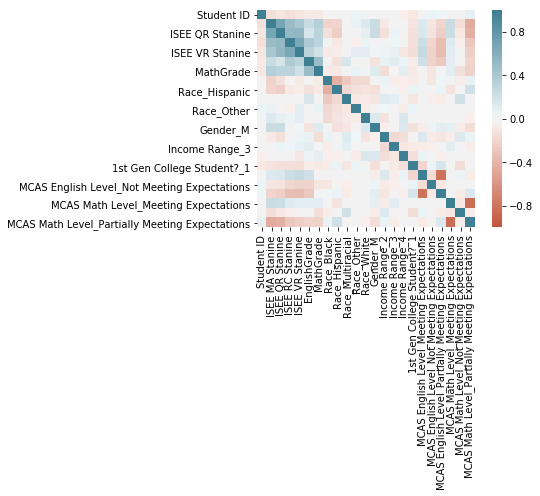

In [47]:
corr = df3.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

In [48]:
df3.head()

,Student ID,ISEE MA Stanine,ISEE QR Stanine,ISEE RC Stanine,ISEE VR Stanine,EnglishGrade,MathGrade,Race_Black,Race_Hispanic,Race_Multiracial,...,Income Range_2,Income Range_3,Income Range_4,1st Gen College Student?_1,MCAS English Level_Meeting Expectations,MCAS English Level_Not Meeting Expectations,MCAS English Level_Partially Meeting Expectations,MCAS Math Level_Meeting Expectations,MCAS Math Level_Not Meeting Expectations,MCAS Math Level_Partially Meeting Expectations
0,1,3,5,8,7,3.4,3.0,1,0,0,...,1,0,0,1,1,0,0,0,0,1
1,2,6,5,5,4,3.0,3.3,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,3,4,3,4,5,3.7,3.7,1,0,0,...,1,0,0,0,1,0,0,1,0,0
3,4,4,3,4,1,2.6,3.0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
4,5,6,5,2,4,3.0,2.7,0,0,0,...,0,0,0,1,1,0,0,1,0,0


In [49]:
df.columns

Index(['Student ID', 'Race', 'Gender', 'Income Range',
       '1st Gen College Student?', 'ISEE MA Stanine', 'ISEE QR Stanine',
       'ISEE RC Stanine', 'ISEE VR Stanine', 'MCAS English Level',
       'MCAS Math Level', 'English Grade', 'Math Grade'],
      dtype='object')

In [52]:
col = df3.loc[: , "ISEE MA Stanine":"ISEE VR Stanine"]

In [53]:
df3['ISEE_avg'] = col.mean(axis=1)
df3

,Student ID,ISEE MA Stanine,ISEE QR Stanine,ISEE RC Stanine,ISEE VR Stanine,EnglishGrade,MathGrade,Race_Black,Race_Hispanic,Race_Multiracial,...,Income Range_3,Income Range_4,1st Gen College Student?_1,MCAS English Level_Meeting Expectations,MCAS English Level_Not Meeting Expectations,MCAS English Level_Partially Meeting Expectations,MCAS Math Level_Meeting Expectations,MCAS Math Level_Not Meeting Expectations,MCAS Math Level_Partially Meeting Expectations,ISEE_avg
0,1,3,5,8,7,3.4,3.0,1,0,0,...,0,0,1,1,0,0,0,0,1,5.75
1,2,6,5,5,4,3.0,3.3,0,0,0,...,0,0,1,1,0,0,0,0,0,5.00
2,3,4,3,4,5,3.7,3.7,1,0,0,...,0,0,0,1,0,0,1,0,0,4.00
3,4,4,3,4,1,2.6,3.0,0,0,0,...,0,0,1,0,0,1,1,0,0,3.00
4,5,6,5,2,4,3.0,2.7,0,0,0,...,0,0,1,1,0,0,1,0,0,4.25
5,6,5,4,5,6,3.0,3.0,0,0,1,...,0,0,0,0,0,0,0,0,1,5.00
6,7,5,5,2,2,2.1,3.0,1,0,0,...,0,0,1,0,0,1,1,0,0,3.50
7,8,7,7,8,6,3.3,4.0,0,0,0,...,0,0,1,1,0,0,0,0,0,7.00
8,9,6,4,8,6,4.0,4.0,1,0,0,...,0,0,1,0,0,0,1,0,0,6.00
9,10,4,3,2,4,2.8,3.7,1,0,0,...,0,0,1,0,0,1,1,0,0,3.25


In [56]:
df3.columns

Index(['Student ID', 'ISEE MA Stanine', 'ISEE QR Stanine', 'ISEE RC Stanine',
       'ISEE VR Stanine', 'EnglishGrade', 'MathGrade', 'Race_Black',
       'Race_Hispanic', 'Race_Multiracial', 'Race_Other', 'Race_White',
       'Gender_M', 'Income Range_2', 'Income Range_3', 'Income Range_4',
       '1st Gen College Student?_1', 'MCAS English Level_Meeting Expectations',
       'MCAS English Level_Not Meeting Expectations',
       'MCAS English Level_Partially Meeting Expectations',
       'MCAS Math Level_Meeting Expectations',
       'MCAS Math Level_Not Meeting Expectations',
       'MCAS Math Level_Partially Meeting Expectations', 'ISEE_avg'],
      dtype='object')

In [57]:
df3.corr().sort_values(by='ISEE_avg').ISEE_avg

MCAS Math Level_Partially Meeting Expectations      -0.423218
MCAS English Level_Partially Meeting Expectations   -0.352271
MCAS English Level_Not Meeting Expectations         -0.190377
Race_Hispanic                                       -0.172180
1st Gen College Student?_1                          -0.160354
Student ID                                          -0.143728
Race_Black                                          -0.125424
MCAS Math Level_Not Meeting Expectations            -0.091540
Income Range_2                                      -0.053999
Income Range_4                                      -0.011945
Race_Multiracial                                    -0.006060
Race_Other                                           0.032188
Income Range_3                                       0.050642
Race_White                                           0.111346
Gender_M                                             0.164230
MCAS Math Level_Meeting Expectations                 0.213965
MCAS Eng

In [58]:
from pandas import DataFrame

In [65]:
#Set interaction terms - EDA/PPM
interactionterms = DataFrame(df3,columns= ['Race_Other', 'Income Range_3'])

In [66]:
#Set my X and Y variables for a mode - PPM
X = interactionterms
y2 = df3.ISEE_avg

In [67]:
# Create linear regression
regrFINAL = LinearRegression()

# Fit the linear regression
modelFINAL = regrFINAL.fit(X, y2)

In [68]:
#Checks Model coefficients
modelFINAL.coef_

array([0.19569698, 0.22938864])

In [69]:
#Set my predictions - PPM
predictionsFINAL = modelFINAL.predict(X)

Text(0, 0.5, 'ISEE Average')

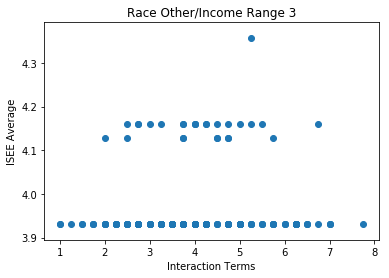

In [70]:
plt.scatter(y2, predictionsFINAL)
plt.title("Race Other/Income Range 3")
plt.xlabel("Interaction Terms")
plt.ylabel("ISEE Average")